In [1]:
import sys
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('train_data.csv')
df

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id,connected
0,42593,1187660,411978,1089020,1187390,412220,1089160,304.185,353043.0,1182170.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
1,42594,1204580,682542,873138,1204640,682870,873890,725.431,244156.0,914243.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
2,42595,1191790,403683,1093180,1188590,402414,1092660,3423.030,363829.0,1171820.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
3,42596,1184320,419286,1082930,1186620,419721,1085540,3442.390,344267.0,1192340.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
4,42597,1189150,673302,944202,1188790,677771,942901,4442.380,313630.0,788566.0,...,RL,1283392,621504,1020280,1196352,492736,919560,557121,518848,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185827,228420,1260230,553602,913395,1262580,551457,912880,3162.000,86928.2,936997.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185828,228421,1214580,405321,916671,1212910,402240,915289,3503.660,114862.0,1136290.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185829,228422,1223920,375081,840987,1221050,372827,843288,3939.260,140923.0,1173670.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False
185830,228423,1253490,387870,853797,1257280,390086,854335,4192.360,110553.0,1126160.0,...,RL,1267840,625088,983200,1261568,461952,910680,557030,553624,False


In [3]:
df.dtypes

ID                                  int64
axonal_coor_x                       int64
axonal_coor_y                       int64
axonal_coor_z                       int64
dendritic_coor_x                    int64
dendritic_coor_y                    int64
dendritic_coor_z                    int64
adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
pre_rf_x                          float64
pre_rf_y                          float64
post_oracle                       float64
post_test_score                   float64
post_rf_x                         float64
post_rf_y                         float64
compartment                        object
pre_brain_area                     object
post_brain_area                    object
pre_nucleus_x                       int64
pre_nucleus_y                       int64
pre_nucleus_z                     

In [4]:
feature_weights = pd.read_csv('feature_weights.csv')
feature_weights

,nucleus_id,feature_weight_0,feature_weight_1,feature_weight_2,feature_weight_3,feature_weight_4,feature_weight_5,feature_weight_6,feature_weight_7,feature_weight_8,...,feature_weight_502,feature_weight_503,feature_weight_504,feature_weight_505,feature_weight_506,feature_weight_507,feature_weight_508,feature_weight_509,feature_weight_510,feature_weight_511
0,557058,0.205733,0.317099,-0.241713,0.014264,-0.314002,-0.432338,0.152562,0.186511,0.140944,...,-0.034500,0.363631,0.183755,0.231815,0.042877,0.402666,0.016072,0.072968,-0.452475,-0.175632
1,155650,0.166665,-0.293123,-0.017896,-0.159223,0.246045,-0.138767,0.217365,-0.174787,-0.050760,...,0.276523,0.333738,0.277954,-0.124248,0.228173,0.029465,0.198626,-0.044919,0.661572,0.110016
2,425987,0.453440,0.174334,0.279131,0.144052,0.218536,0.110859,-0.090576,0.125406,0.110690,...,0.300525,-0.160008,0.052873,0.112233,-0.091779,-0.046790,0.280856,0.399340,0.305763,0.218547
3,262149,0.537410,0.165957,0.543808,-0.386137,-0.113595,0.046351,0.054061,0.247789,-0.502975,...,-0.113184,0.117278,0.011819,0.491052,-0.161192,0.868506,0.215711,0.108492,-0.607824,0.296478
4,557067,-0.193376,-0.058421,-0.074607,0.009510,-0.038007,0.011739,-0.141879,0.308456,0.392383,...,0.327086,0.413605,-0.092548,-0.091461,-0.025144,-0.202813,0.241059,0.014646,-0.073372,-0.242132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2687,368622,-0.330541,0.475290,0.010314,0.532330,-0.475708,0.443309,0.129722,-0.246515,0.317328,...,-0.000365,-0.001144,0.316298,0.075985,0.049807,-0.024745,0.322744,-0.502619,0.218220,-0.048334
2688,614382,0.275322,0.435353,0.091335,-0.033993,-0.504363,-0.133884,-0.367399,0.478917,0.033984,...,0.121871,-0.017587,0.141196,0.140291,0.354196,-0.044375,0.495297,0.369650,0.114305,0.281917
2689,557041,-0.598981,0.061932,-0.074026,0.171314,-0.250348,0.438974,-0.235911,0.036702,0.365656,...,0.039513,-0.141897,-0.232804,0.020774,0.542075,0.380731,0.189838,0.150242,-0.222899,-0.032958
2690,196596,0.024009,0.075810,0.314906,-0.302266,0.007095,0.024825,0.432788,-0.238054,0.210615,...,0.218091,0.377625,0.157004,0.265006,0.412147,0.088211,0.780171,0.079002,-0.009118,0.244956


In [5]:
morph_embeddings = pd.read_csv('morph_embeddings.csv')
morph_embeddings

,nucleus_id,morph_emb_0,morph_emb_1,morph_emb_2,morph_emb_3,morph_emb_4,morph_emb_5,morph_emb_6,morph_emb_7,morph_emb_8,...,morph_emb_22,morph_emb_23,morph_emb_24,morph_emb_25,morph_emb_26,morph_emb_27,morph_emb_28,morph_emb_29,morph_emb_30,morph_emb_31
0,557058,0.748665,0.003966,-0.409828,0.549701,0.877232,-0.861881,0.629896,-0.630121,-1.311927,...,0.300712,-1.397289,1.118014,-0.183371,0.246255,0.496138,0.008009,0.349553,-1.490972,0.034168
1,155650,0.608481,-0.415141,0.365810,0.732117,-0.107357,-1.346027,-0.597964,-0.618534,-0.429153,...,-1.016053,-1.069679,0.031847,-0.703084,0.367078,-0.054149,0.341367,0.757009,-1.037782,-1.001121
2,425987,0.275470,0.384237,-0.591495,1.422552,0.587310,-1.279693,0.823187,-0.459843,-0.620660,...,0.094792,-1.221155,1.003695,-0.654525,-0.083740,0.745382,0.226264,0.034323,-1.541942,-0.342919
3,262149,0.642875,0.554093,-0.629258,1.279186,0.834185,-0.887523,1.052660,-0.252436,-0.479046,...,0.121963,-1.371947,0.946631,-0.399507,-0.180614,0.965515,0.514904,0.118434,-1.490275,-0.101109
4,557067,-0.099494,0.317106,-0.487286,0.963860,0.805484,-1.050071,1.271212,-0.220312,-0.938172,...,0.711220,-1.327322,0.914697,-0.734054,0.244786,0.235148,0.241681,0.445482,-1.314073,0.120069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2662,368622,0.873676,0.423390,-0.761424,0.347703,0.909603,-0.681839,1.954970,0.292521,-0.569789,...,0.631304,-1.632103,0.773492,-0.402078,0.333562,0.596720,0.634237,-0.052678,-1.086833,0.630007
2663,614382,0.285185,0.756431,-0.504513,1.221981,0.680886,-1.068822,0.794427,-0.820927,-0.719917,...,0.149082,-1.459964,0.895938,-0.809432,0.492356,0.290293,-0.056787,0.449943,-1.465123,-0.285587
2664,557041,1.000909,-0.269747,-0.404520,0.338924,0.988922,-0.975366,0.689095,-0.329750,-1.090898,...,0.104898,-1.258816,1.209954,-0.299763,0.031836,0.807699,0.286448,-0.137722,-1.562565,0.324807
2665,196596,1.121776,0.140512,-0.380805,0.313302,0.883713,-1.028015,1.484881,0.099239,-0.676376,...,0.400964,-1.606705,0.851969,-0.796522,0.432455,0.426968,0.166209,-0.090414,-1.111706,0.474158


### Data Merge

In [6]:
# join all feature_weight_i columns into a single np.array column
feature_weights["feature_weights"] = (
    feature_weights.filter(regex="feature_weight_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the feature_weight_i columns
feature_weights.drop(
    feature_weights.filter(regex="feature_weight_").columns, axis=1, inplace=True
)

# join all morph_embed_i columns into a single np.array column
morph_embeddings["morph_embeddings"] = (
    morph_embeddings.filter(regex="morph_emb_")
    .sort_index(axis=1)
    .apply(lambda x: np.array(x), axis=1)
)
# delete the morph_embed_i columns
morph_embeddings.drop(
    morph_embeddings.filter(regex="morph_emb_").columns, axis=1, inplace=True
)

In [7]:
df = (
    df.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [8]:
print("Data Size:",df.shape)
print("\nData:")
df.info()

Data Size: (185832, 34)

Data:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185832 entries, 0 to 185831
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              185832 non-null  int64  
 1   axonal_coor_x                   185832 non-null  int64  
 2   axonal_coor_y                   185832 non-null  int64  
 3   axonal_coor_z                   185832 non-null  int64  
 4   dendritic_coor_x                185832 non-null  int64  
 5   dendritic_coor_y                185832 non-null  int64  
 6   dendritic_coor_z                185832 non-null  int64  
 7   adp_dist                        185832 non-null  float64
 8   post_skeletal_distance_to_soma  185832 non-null  float64
 9   pre_skeletal_distance_to_soma   185832 non-null  float64
 10  pre_oracle                      185832 non-null  float64
 11  pre_test_score                  185832 non-null

### EDA

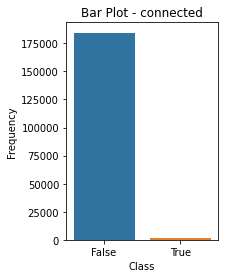

In [9]:
plt.subplot(1, 2, 1)
sns.countplot(data=df, x="connected")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Bar Plot - connected")
plt.show()

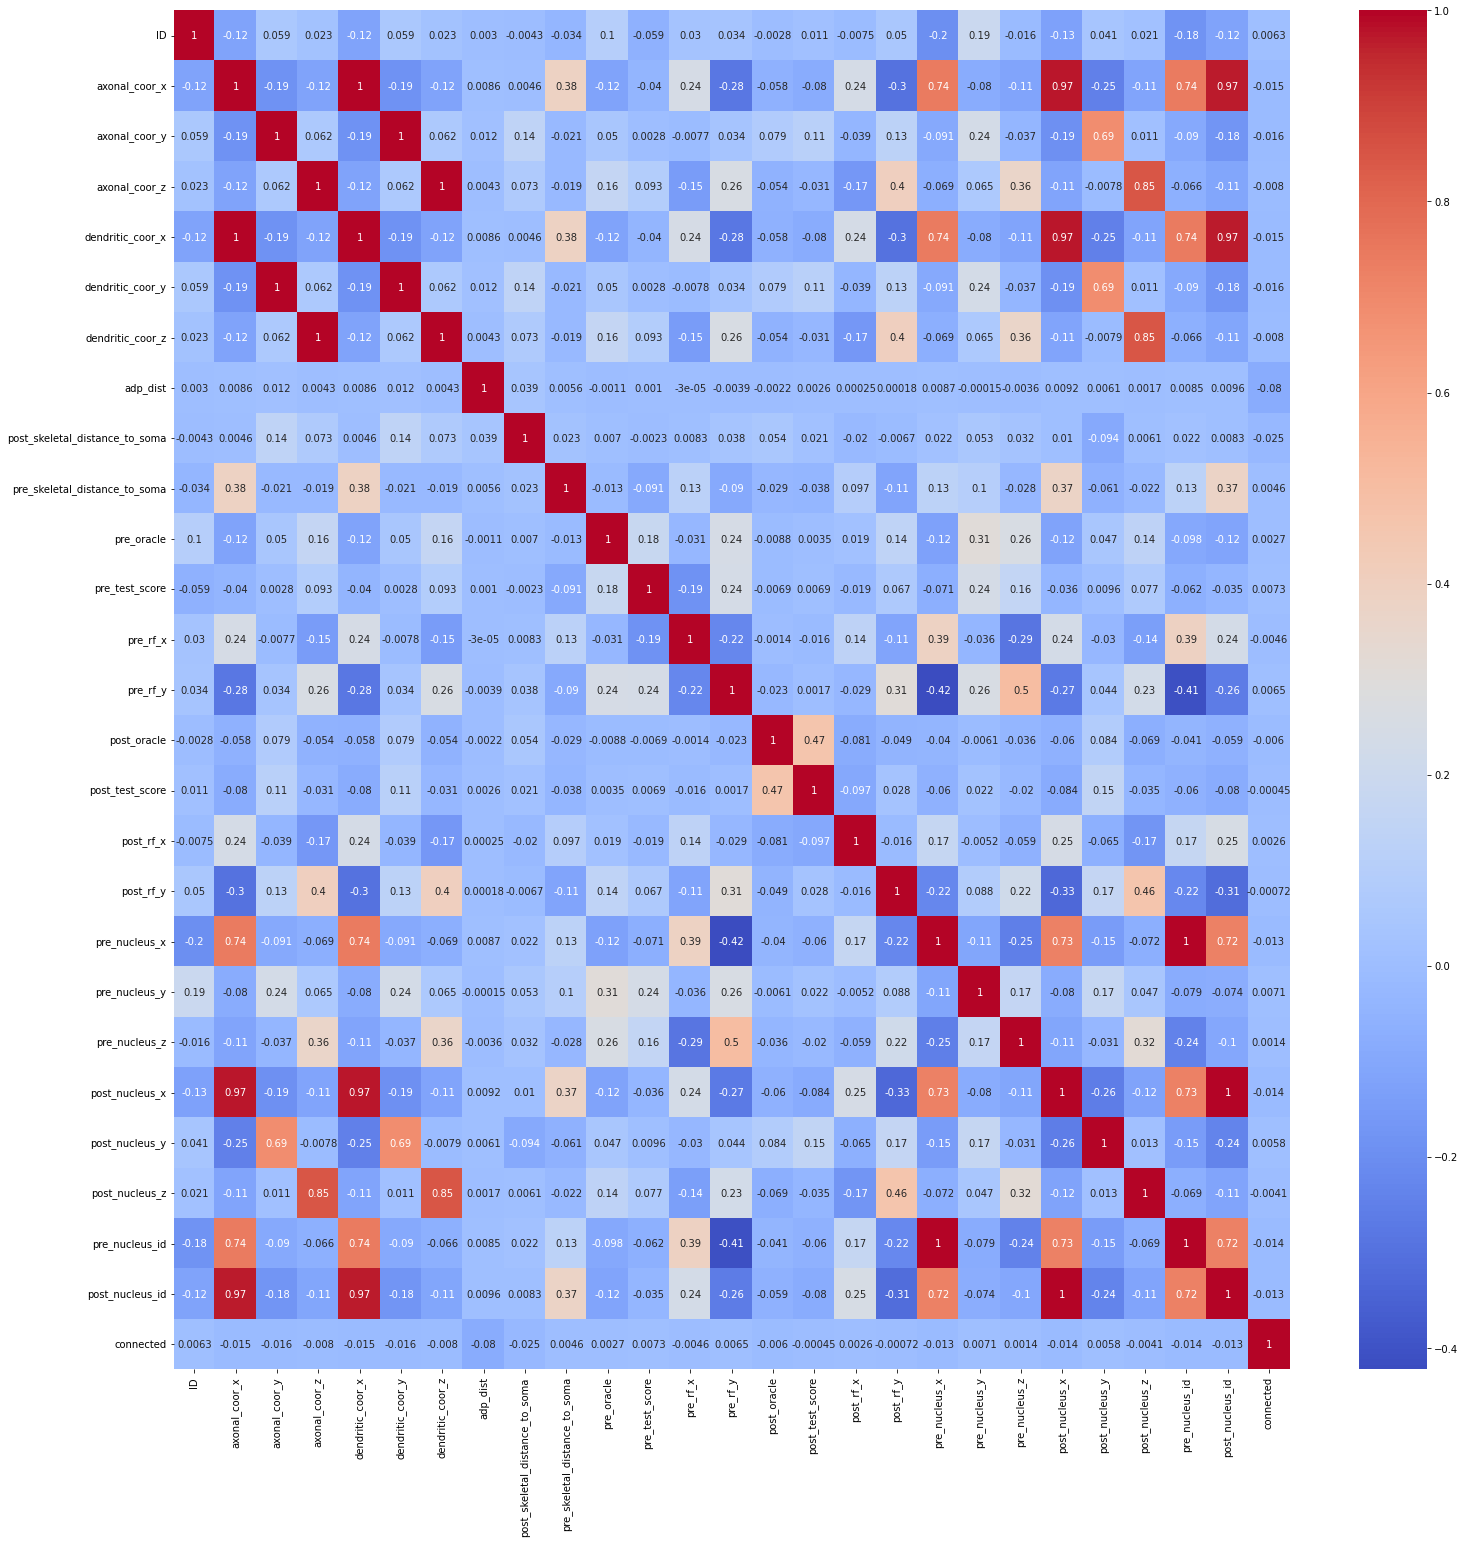

In [10]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [11]:
print(df['pre_morph_embeddings'][:20][1])

print(df['post_morph_embeddings'][:10][0])

[ 0.37331563  0.20981796 -0.12377156  0.69827348 -0.36436009 -0.08803897
 -0.95162904 -1.84342027 -0.53751272  0.48871696 -0.04196498  0.5997926
 -0.54694623 -0.75036496  0.55511707  0.52048707 -1.53206408  0.92715424
 -0.50563061  0.44323295  0.27195328  0.36682391  0.50746822  0.6308834
 -1.39840472  0.09875204  0.83224845 -0.98368824  1.08574307 -0.39546612
 -1.15127075 -0.4951764 ]
[ 1.0723995  -0.75409424  0.11248356 -0.33294636  0.74433136  1.22747672
 -0.83208716 -0.03111291 -0.36152899  0.55694693 -0.29966968 -0.0296001
  0.89789367 -2.2048285  -0.38498485 -1.06485069 -0.81627333 -0.21522449
 -0.59838223  0.54533499 -0.52522391  0.1716475   1.02296185 -0.04220269
 -0.64514601 -0.687774   -0.12143467 -0.93764007 -0.85765183 -0.41315266
 -0.3406806   0.79048932]


In [12]:
df['pre_morph_embeddings'].isna().sum()

47709

In [13]:
df['post_morph_embeddings'].isna().sum()

0

In [14]:
type(df['pre_morph_embeddings'][:20][1])

numpy.ndarray

In [15]:
# Check which arrays in the Series have NaN values
pre_morph_series = df['pre_morph_embeddings']
arrays_with_nan = pre_morph_series[pre_morph_series.apply(lambda arr: np.isnan(arr).any())]

# Now 'arrays_with_nan' is a boolean Series indicating which arrays have NaN values
print(arrays_with_nan)

20458     NaN
20459     NaN
20460     NaN
20461     NaN
20462     NaN
         ... 
179187    NaN
179188    NaN
179189    NaN
179190    NaN
179191    NaN
Name: pre_morph_embeddings, Length: 47709, dtype: object


In [16]:
print(df['compartment'])
print(df['compartment'].unique())
print(df['compartment'].nunique())

0                axon
1                axon
2                axon
3                axon
4                axon
             ...     
185827           axon
185828    apical_tuft
185829    apical_tuft
185830    apical_tuft
185831           axon
Name: compartment, Length: 185832, dtype: object
['axon' 'oblique' 'apical' 'basal' 'soma' 'apical_tuft' 'apical_shaft']
7


In [17]:
df.describe()

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,post_rf_x,post_rf_y,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id
count,185832.000000,1.858320e+05,1.858320e+05,1.858320e+05,1.858320e+05,1.858320e+05,1.858320e+05,185832.000000,1.858320e+05,1.858320e+05,...,185832.000000,185832.000000,1.858320e+05,185832.000000,1.858320e+05,1.858320e+05,185832.000000,1.858320e+05,185832.000000,185832.000000
mean,135508.500000,1.064839e+06,6.355946e+05,8.686252e+05,1.064839e+06,6.355682e+05,8.686154e+05,2504.942886,1.197602e+05,8.059328e+05,...,882.106377,551.630843,1.056598e+06,565311.158294,8.594359e+05,1.064603e+06,616317.829954,8.650727e+05,444051.831089,449398.818271
std,53645.221949,2.755125e+05,1.282959e+05,1.013454e+05,2.755147e+05,1.282878e+05,1.013388e+05,1451.981377,1.162254e+05,4.040988e+05,...,55.471924,50.626562,2.874460e+05,105434.704702,8.789992e+04,2.787515e+05,110972.976152,9.769970e+04,142163.217350,137218.456147
min,42593.000000,3.728340e+05,2.899680e+05,5.940060e+05,3.740490e+05,2.922430e+05,5.938130e+05,0.023439,0.000000e+00,0.000000e+00,...,720.054623,375.266522,5.763200e+05,402624.000000,6.250000e+05,4.519680e+05,373376.000000,6.446800e+05,189149.000000,109379.000000
25%,89050.750000,7.692720e+05,5.387760e+05,7.919310e+05,7.694320e+05,5.389198e+05,7.918698e+05,1198.125000,5.449802e+04,5.303278e+05,...,837.068399,526.724932,7.406080e+05,475904.000000,7.915200e+05,7.603840e+05,523328.000000,7.863600e+05,294776.000000,301216.000000
50%,135508.500000,1.187090e+06,6.591165e+05,8.695260e+05,1.187100e+06,6.589870e+05,8.696060e+05,2478.690000,9.051745e+04,7.332060e+05,...,875.133201,555.494070,1.194624e+06,535040.000000,8.445200e+05,1.188224e+06,626112.000000,8.690400e+05,518224.000000,518801.000000
75%,181966.250000,1.304965e+06,7.277760e+05,9.445800e+05,1.304840e+06,7.278462e+05,9.445852e+05,3788.427500,1.384212e+05,1.019975e+06,...,918.585627,586.433995,1.311616e+06,665856.000000,9.198800e+05,1.311744e+06,698368.000000,9.380400e+05,580826.000000,580918.000000
max,228424.000000,1.594510e+06,1.095880e+06,1.114280e+06,1.595170e+06,1.095490e+06,1.114580e+06,4999.990000,1.901600e+06,2.433020e+06,...,1089.618514,724.663203,1.409408e+06,904768.000000,1.078000e+06,1.457408e+06,918464.000000,1.064200e+06,612352.000000,669554.000000


### Pre-processing

In [18]:
#cosine similarity function
def row_feature_similarity(row):
    pre = row["pre_feature_weights"]
    post = row["post_feature_weights"]
    return (pre * post).sum() / (np.linalg.norm(pre) * np.linalg.norm(post))

In [19]:
# get the difference between pre and post nucleus distance
def get_dist(row):
    return np.linalg.norm(np.array([row['pre_nucleus_x'], row['pre_nucleus_y'], row['pre_nucleus_z']]) - 
                         np.array([row['post_nucleus_x'], row['post_nucleus_y'], row['post_nucleus_z']]))

In [20]:
from sklearn.preprocessing import StandardScaler

def feat_engineering(data):
    # Combine our pre and post areas into one projection group feature
    data["projection_group"] = (
        data["pre_brain_area"].astype(str)
        + "->"
        + data["post_brain_area"].astype(str)
    )
    data = data.drop(columns = ['pre_brain_area', 'post_brain_area'])
    
    # label encode our projection groups
    data["projection_group"] = pd.factorize(data["projection_group"])[0]
    
    
    # Get the distance between pre and post nucleus
    data["nucleus_dist"] = data.apply(get_dist, axis=1)
    data = data.drop(columns = ['pre_nucleus_x', 'pre_nucleus_y', 'pre_nucleus_z',
                               'post_nucleus_x', 'post_nucleus_y', 'post_nucleus_z'])
    
    
    # combine axonal and dendritic coords due to their 1:1 correlation
    data['axonal_dendritic_x'] = (data['axonal_coor_x'] + data['dendritic_coor_x'])/2
    data['axonal_dendritic_y'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data['axonal_dendritic_z'] = (data['axonal_coor_y'] + data['dendritic_coor_z'])/2
    data = data.drop(columns = ['axonal_coor_x', 'axonal_coor_y', 'axonal_coor_z',
                           'dendritic_coor_x', 'dendritic_coor_y', 'dendritic_coor_z'])
    
    
    # combine feature similarities
    data["fw_similarity"] = data.apply(row_feature_similarity, axis=1)
    data = data.drop(columns=['pre_feature_weights', 'post_feature_weights'])
    
    # one hot encode the 7 unique compartment types
    data = pd.get_dummies(data, columns=['compartment'], prefix=['compartment'])
    
    # Since this feature has missing values, some rows do not have an array of embeddings at all
    data['pre_morph_embeddings'].fillna(method='ffill', inplace=True)
    
    # Split the embedding feature arrays into individual features
    pre_embedding_columns = [f"pre_embedding_{i}" for i in range(32)]
    data[pre_embedding_columns] = data['pre_morph_embeddings'].apply(pd.Series)
    
    post_embedding_columns = [f"post_embedding_{i}" for i in range(32)]
    data[post_embedding_columns] = data['post_morph_embeddings'].apply(pd.Series)
    data = data.drop(columns = ['pre_morph_embeddings', 'post_morph_embeddings'])
    
    # fill in any remaining NaNs, temp solution for now
    data.fillna(method='ffill', inplace=True)
    
    # scaling
    scaler = StandardScaler()    
    data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    
    return data

In [21]:
from sklearn.decomposition import PCA

def dim_reduction(data):
    # Run PCA to reduce the number of embedding features
    # Specify the number of components you want to retain
    num_components = 8

    pca = PCA(n_components=num_components)
    embeddings_pca = pca.fit_transform(data.iloc[:, -64:])
    
    pca_feature_names = [f'pca_{i}' for i in range(1, 1 + num_components)]
    
    data.drop(data.columns[-64:], axis=1, inplace=True)
    data[pca_feature_names] = embeddings_pca
    
    return data

In [50]:
y = df['connected']
X = df.drop(columns = ['ID', 'connected'])
X = feat_engineering(X)
X = dim_reduction(X)

In [23]:
X.dtypes

adp_dist                          float64
post_skeletal_distance_to_soma    float64
pre_skeletal_distance_to_soma     float64
pre_oracle                        float64
pre_test_score                    float64
pre_rf_x                          float64
pre_rf_y                          float64
post_oracle                       float64
post_test_score                   float64
post_rf_x                         float64
post_rf_y                         float64
pre_nucleus_id                    float64
post_nucleus_id                   float64
projection_group                  float64
nucleus_dist                      float64
axonal_dendritic_x                float64
axonal_dendritic_y                float64
axonal_dendritic_z                float64
fw_similarity                     float64
compartment_apical                float64
compartment_apical_shaft          float64
compartment_apical_tuft           float64
compartment_axon                  float64
compartment_basal                 

In [24]:
X.head(10)

,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,pre_rf_x,pre_rf_y,post_oracle,post_test_score,post_rf_x,...,compartment_oblique,compartment_soma,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8
0,-1.515697,2.007164,0.931055,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.305182,-0.103005,-0.624985,6.535508,-2.613224,1.854323,3.239077,-1.040748,-1.511564,-1.764508
1,-1.225578,1.070301,0.268030,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.305182,-0.103005,-0.624985,6.535508,-2.613224,1.854323,3.239077,-1.040748,-1.511564,-1.764508
2,0.632301,2.099967,0.905442,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.305182,-0.103005,-0.624985,6.535508,-2.613224,1.854323,3.239077,-1.040748,-1.511564,-1.764508
3,0.645635,1.931656,0.956222,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.305182,-0.103005,-0.624985,6.535508,-2.613224,1.854323,3.239077,-1.040748,-1.511564,-1.764508
4,1.334344,1.668055,-0.042977,0.037561,0.78798,0.314844,-0.678039,1.191761,-0.205420,-0.425183,...,-0.305182,-0.103005,-0.624985,6.535508,-2.613224,1.854323,3.239077,-1.040748,-1.511564,-1.764508
5,0.845858,1.264106,0.019040,0.037561,0.78798,0.314844,-0.678039,-1.855221,-1.348857,-0.471062,...,-0.305182,-0.103005,0.321333,8.414307,0.035760,-1.372177,0.600597,-0.450228,-0.858078,-1.637040
6,-1.408253,-0.356693,0.292212,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,3.276737,-0.103005,-2.084099,4.677394,-2.986969,2.028321,0.420580,-0.449682,-1.049055,-2.633134
7,-1.366682,-0.006678,-1.005338,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,3.276737,-0.103005,-2.084099,4.677394,-2.986969,2.028321,0.420580,-0.449682,-1.049055,-2.633134
8,-1.149227,1.005349,-0.315775,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,-0.305182,-0.103005,-2.084099,4.677394,-2.986969,2.028321,0.420580,-0.449682,-1.049055,-2.633134
9,-0.811027,1.565125,0.052589,0.037561,0.78798,0.314844,-0.678039,-0.086768,-0.000362,-0.682935,...,-0.305182,-0.103005,-2.084099,4.677394,-2.986969,2.028321,0.420580,-0.449682,-1.049055,-2.633134


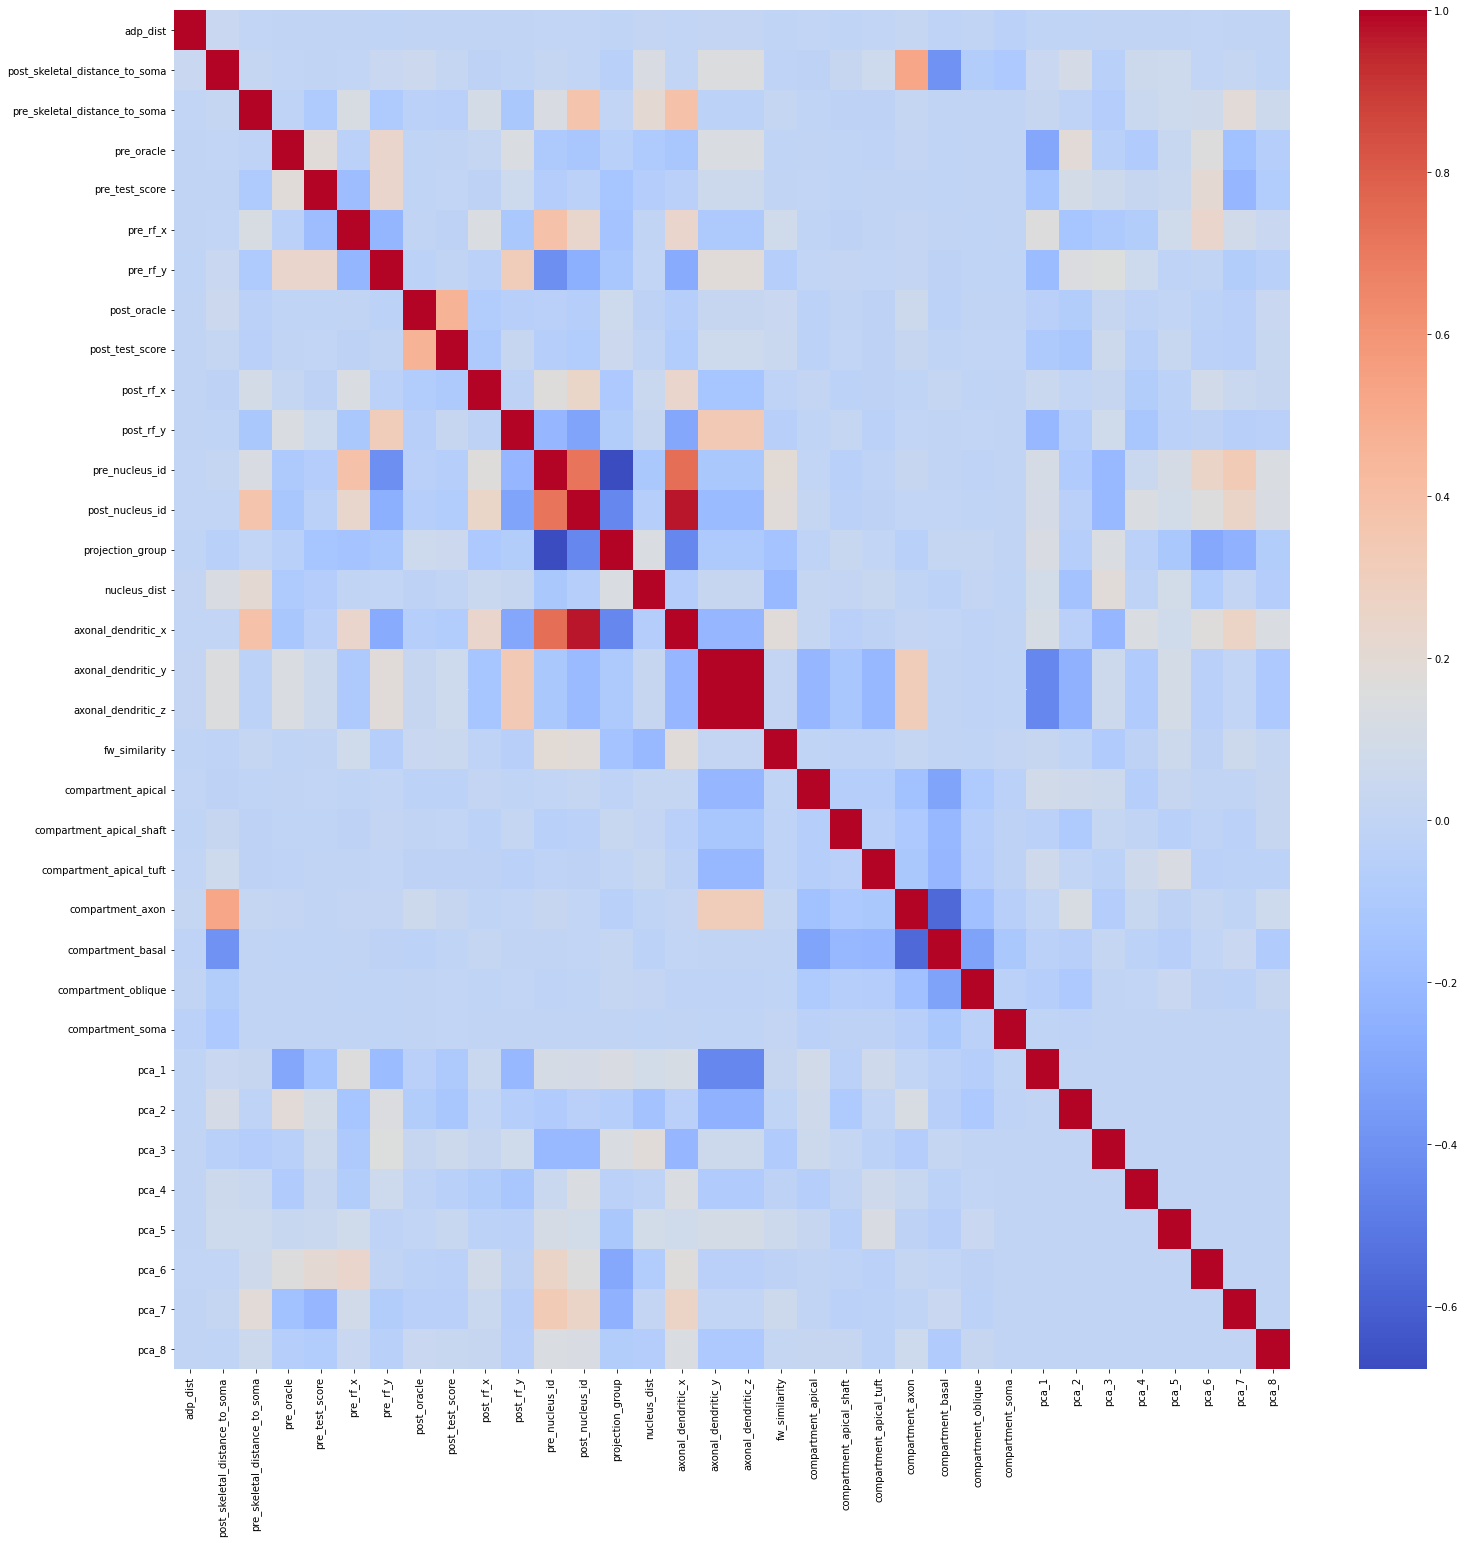

In [25]:
plt.figure(figsize = (25,25))
sns.heatmap(X.corr(), annot=False, cmap="coolwarm")
plt.show()

In [26]:
print(X['fw_similarity'].head(20))

0    -0.182150
1    -0.182150
2    -0.182150
3    -0.182150
4    -0.182150
5     0.299404
6     0.974132
7     0.974132
8     0.974132
9     0.974132
10    0.974132
11    0.974132
12    0.974132
13    0.974132
14    0.974132
15    0.974132
16    0.974132
17   -0.527449
18   -0.527449
19   -0.527449
Name: fw_similarity, dtype: float64


In [51]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split


X_train, X_valid, y_train, y_valid = train_test_split(
     X, y, test_size=0.15, random_state = 42, stratify = y)

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(
    X_train, y_train
)

### Model Fitting

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import time

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

modelLR = LogisticRegression(random_state = 42, max_iter = 500, n_jobs = -1, tol=1e-10)

paramsLR = {
    'C': [1e-10, 1e-4, 1e-2, 1, 3, 5, 10, 20, 50],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'l1_ratio': [uniform(0, 1)],
    'class_weight':[None, 
                    {'False': 1,'True':(len(df[df['connected'] == False]) / len(df[df['connected' ] == True]))},
                    {'False': 1,'True':100},
                    'balanced']
    }


    
random_searchLR = RandomizedSearchCV(modelLR, param_distributions=paramsLR,
                                   n_iter=50, scoring='f1', 
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

start = time.time()
random_searchLR.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = random_searchLR.predict(X_valid)
print(classification_report(y_valid, yhat))



Fitting 10 folds for each of 50 candidates, totalling 500 fits


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.71547579        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 0.80483046        nan        nan        nan        nan        nan
 0.80234685        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan 0.80651515        nan        nan
        nan        nan]
  category=UserWarning
c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\_logistic.py:1319: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(sel

258.82045578956604
              precision    recall  f1-score   support

       False       1.00      0.71      0.83     27670
        True       0.02      0.80      0.04       205

    accuracy                           0.71     27875
   macro avg       0.51      0.75      0.44     27875
weighted avg       0.99      0.71      0.83     27875



In [53]:
print('\n All results:')
print(random_searchLR.cv_results_)
print('\n Best estimator:')
print(random_searchLR.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, 20))
print(random_searchLR.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_searchLR.best_params_)
results = pd.DataFrame(random_searchLR.cv_results_)
results


 All results:
{'mean_fit_time': array([  0.58761191,   2.29575887,   1.43837621,   0.726757  ,
         0.63011551,   1.44328446,   0.697171  ,   0.66210444,
         0.74595585,   0.71658423,   0.69504199,   1.49511817,
         0.70282862,   0.69414396,   0.72780888,   0.69521153,
         0.72994893,   1.47397435, 145.54933193,   0.7225904 ,
         0.76272366,   0.76942031,   1.68867414,   0.74897733,
        11.54014814,   1.73848507,   0.76825352,   1.59584813,
         0.79053369,   0.79669449,   1.5892169 ,   0.77343409,
         0.78251061,   0.77883031,   1.55814385,   1.55160322,
         1.56959541,   1.55831604,   0.7173723 ,   0.76487653,
         0.7718518 ,   0.78193965,   0.7938601 ,   1.62181895,
         0.76916115,  48.50653667,   0.78678567,   1.6414547 ,
         1.47791889,   0.64390409]), 'std_fit_time': array([3.54735484e-02, 8.73024223e-02, 3.29327790e-02, 5.45005265e-02,
       2.17217943e-02, 8.13322365e-02, 1.07958709e-01, 7.20109955e-02,
       3.4441671

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_penalty,param_l1_ratio,param_class_weight,param_C,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.587612,0.035474,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 135.04099560761347}",10,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
1,2.295759,0.087302,0.023103,0.006602,l2,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,1e-10,"{'penalty': 'l2', 'l1_ratio': <scipy.stats._di...",0.711937,...,0.714718,0.715772,0.714399,0.718243,0.716429,0.713965,0.716297,0.715476,0.001963,4
2,1.438376,0.032933,0.000000,0.000000,l2,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 135.04099560761347}",1e-10,"{'penalty': 'l2', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
3,0.726757,0.054501,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,10,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
4,0.630116,0.021722,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,None,5,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
5,1.443284,0.081332,0.000000,0.000000,l2,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 100}",5,"{'penalty': 'l2', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31
6,0.697171,0.107959,0.000000,0.000000,l1,<scipy.stats._distn_infrastructure.rv_frozen o...,"{'False': 1, 'True': 100}",0.01,"{'penalty': 'l1', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32
7,0.662104,0.072011,0.000000,0.000000,l1,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,1,"{'penalty': 'l1', 'l1_ratio': <scipy.stats._di...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
8,0.745956,0.034442,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,20,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34
9,0.716584,0.026947,0.000000,0.000000,elasticnet,<scipy.stats._distn_infrastructure.rv_frozen o...,balanced,1e-10,"{'penalty': 'elasticnet', 'l1_ratio': <scipy.s...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35


In [29]:
from sklearn.naive_bayes import GaussianNB

modelNB = GaussianNB()
modelNB.fit(X_train, np.ravel(y_train)) 
yhat = modelNB.predict(X_valid)

loss = log_loss(yhat, y_valid)
print(loss)

print(classification_report(y_valid, yhat))




25.881469551056014
              precision    recall  f1-score   support

       False       1.00      0.25      0.39     27670
        True       0.01      0.99      0.02       205

    accuracy                           0.25     27875
   macro avg       0.50      0.62      0.21     27875
weighted avg       0.99      0.25      0.39     27875



In [31]:
from sklearn.ensemble import RandomForestClassifier


    

paramsRF = {
    'bootstrap': [True, False],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_depth': [2, 4, 6, 8, 10, 20, None],
    'max_features': [2, 3, 4, 5, 'sqrt'],
    'class_weight':[None, 'balanced', 'balanced_subsample']
    }



modelRF = RandomForestClassifier(n_estimators = 300, oob_score = True, n_jobs = -1, 
                                 random_state = 42)
    
random_searchRF = RandomizedSearchCV(modelRF, param_distributions=paramsRF,
                                   n_iter=30, scoring='f1',
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

start = time.time()
random_searchRF.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = random_searchRF.predict(X_valid)
print(classification_report(y_valid, yhat))



Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
 0.99944866        nan 0.99650459 0.90636434        nan 0.84920343
 0.80814558 0.98811178        nan 0.92322631        nan        nan
 0.84009774 0.87409121 0.9137958         nan        nan        nan
 0.99446946 0.82082664        nan        nan 0.86747142 0.88172813]
  category=UserWarning


1244.4772772789001
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     27670
        True       0.07      0.01      0.02       205

    accuracy                           0.99     27875
   macro avg       0.53      0.50      0.51     27875
weighted avg       0.99      0.99      0.99     27875



In [32]:
print('\n All results:')
print(random_searchRF.cv_results_)
print('\n Best estimator:')
print(random_searchRF.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, 20))
print(random_searchRF.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_searchRF.best_params_)
results = pd.DataFrame(random_searchRF.cv_results_)
results


 All results:
{'mean_fit_time': array([4.27257490e-01, 4.35435915e-01, 2.57612562e-01, 2.14227533e-01,
       2.43549109e-01, 3.20741606e-01, 3.46011512e+02, 7.87130690e-01,
       3.74069956e+02, 3.37227353e+02, 3.35467587e+00, 2.96130234e+02,
       2.43152054e+02, 3.35573494e+02, 4.02324395e+00, 2.23531784e+02,
       1.02007217e+00, 1.51115899e+00, 2.57681303e+02, 2.32470103e+02,
       2.13724219e+02, 1.71062617e+00, 1.81514668e+00, 1.38210430e+00,
       2.68214743e+02, 2.23493302e+02, 3.60017519e+00, 3.77590547e+00,
       1.85997944e+02, 8.53823343e+01]), 'std_fit_time': array([2.44833389e-02, 1.44751965e-02, 1.64676039e-01, 2.74763278e-02,
       7.73571345e-03, 5.96158892e-02, 5.69447148e+00, 7.86820901e-02,
       2.06620382e+01, 3.82774727e+00, 1.70926282e+00, 1.63613843e+01,
       2.68776605e+00, 1.27574264e+01, 4.03367603e-01, 7.28785615e+00,
       8.22407871e-02, 7.84444294e-02, 1.76672370e+01, 4.06293378e+00,
       1.99013568e+01, 7.00193662e-02, 1.01319968e-01, 3.6

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_class_weight,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.427257,0.024483,0.000000,0.000000,5,4,5,None,None,False,"{'min_samples_split': 5, 'min_samples_leaf': 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
1,0.435436,0.014475,0.000000,0.000000,5,1,4,6,None,False,"{'min_samples_split': 5, 'min_samples_leaf': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
2,0.257613,0.164676,0.000000,0.000000,10,4,5,8,balanced_subsample,False,"{'min_samples_split': 10, 'min_samples_leaf': ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,27
3,0.214228,0.027476,0.000000,0.000000,2,2,5,10,balanced_subsample,False,"{'min_samples_split': 2, 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
4,0.243549,0.007736,0.000000,0.000000,2,2,4,10,balanced,False,"{'min_samples_split': 2, 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,25
5,0.320742,0.059616,0.000000,0.000000,2,1,4,8,balanced_subsample,False,"{'min_samples_split': 2, 'min_samples_leaf': 1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
6,346.011512,5.694471,6.045255,2.292080,10,1,3,None,balanced,True,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.999235,0.999283,0.999442,0.999649,0.999633,0.999449,0.000172,1
7,0.787131,0.078682,0.000000,0.000000,2,2,3,20,balanced_subsample,False,"{'min_samples_split': 2, 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,23
8,374.069956,20.662038,15.599074,4.384307,5,2,2,20,balanced_subsample,True,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.996489,0.996014,0.996584,0.996821,0.996615,0.996505,0.000268,2
9,337.227353,3.827747,1.530540,1.250870,10,2,5,10,None,True,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.903169,0.908324,0.906859,0.907559,0.905911,0.906364,0.001785,7


0.2862285081794699
              precision    recall  f1-score   support

       False       0.99      1.00      1.00     27670
        True       0.07      0.01      0.02       205

    accuracy                           0.99     27875
   macro avg       0.53      0.50      0.51     27875
weighted avg       0.99      0.99      0.99     27875



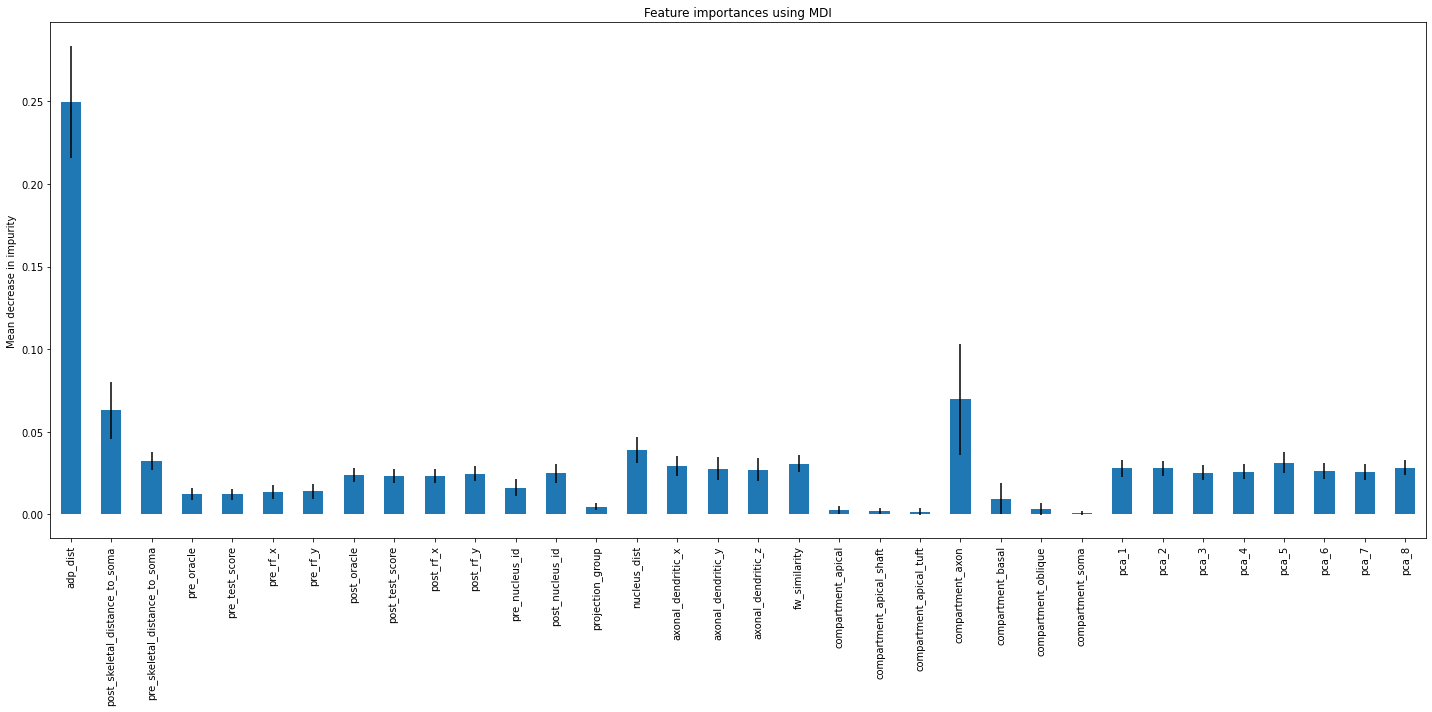

In [33]:
importances = random_searchRF.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_searchRF.estimators_], axis=0)

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax, figsize = (20,10))
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [34]:
from xgboost import XGBClassifier

paramsXGB = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 2, 5],
        'lambda': [0.5, 1, 2, 5, 10, 100],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [2, 4, 6, 8],
        'eta': [0.01, 0.02, 0.05, 0.1, 0.3],
        'scale_pos_weight': [1, 10, 100, (len(df[df['connected'] == False]) / len(df[df['connected' ] == True]))]
        }
    
modelXGB = XGBClassifier(n_estimators= 300, objective='binary:logistic', verbosity=0)
    
random_searchXGB = RandomizedSearchCV(modelXGB, param_distributions=paramsXGB,
                                   n_iter=30, scoring='f1',
                                   n_jobs=-1, cv=skf.split(X_train,y_train), verbose=3, random_state=42 )

start = time.time()
random_searchXGB.fit(X_train, y_train)
end = time.time()
print(end - start)

yhat = random_searchXGB.predict(X_valid)
print(classification_report(y_valid, yhat))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


2001.3203196525574
              precision    recall  f1-score   support

       False       0.99      0.98      0.99     27670
        True       0.05      0.14      0.07       205

    accuracy                           0.97     27875
   macro avg       0.52      0.56      0.53     27875
weighted avg       0.99      0.97      0.98     27875



In [35]:
print('\n All results:')
print(random_searchXGB.cv_results_)
print('\n Best estimator:')
print(random_searchXGB.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (5, 20))
print(random_searchXGB.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_searchXGB.best_params_)
results = pd.DataFrame(random_searchXGB.cv_results_)
results


 All results:
{'mean_fit_time': array([247.88070397, 266.27273388, 416.18766518, 260.91531343,
       147.99346833, 279.76818314,  70.42153172, 154.37807827,
       290.93440218, 294.87367082, 168.88688984, 165.0920352 ,
       152.94431129, 239.84159617, 140.26181746, 263.47222099,
       397.92975612, 239.45502963,  74.66698155,  78.10638647,
       145.39050612, 151.60948   , 152.19690971, 432.24461699,
       265.9633615 ,  75.61863751, 217.76401949, 241.53945694,
        65.58206935,  88.73477216]), 'std_fit_time': array([ 3.81687984,  1.61865945,  1.8209168 ,  4.17982343,  0.80190355,
        6.07578377,  0.42201269,  1.18079663,  0.90966222,  2.1553868 ,
        1.98083576,  3.07209679,  0.28278619,  2.24765092,  6.33168023,
        2.27018326,  6.58297564,  0.57779355,  4.21108642,  2.05251846,
        0.79511639,  0.96934567,  2.52125748,  3.77812731,  1.18587899,
        1.22737822,  3.13518312, 31.35696834,  1.50658097, 11.98919571]), 'mean_score_time': array([0.11289825, 0

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_scale_pos_weight,param_min_child_weight,param_max_depth,param_lambda,param_gamma,...,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,247.880704,3.816880,0.112898,0.011925,0.6,10,10,6,1,2,...,0.6,"{'subsample': 0.6, 'scale_pos_weight': 10, 'mi...",0.988245,0.989150,0.989961,0.989727,0.988604,0.989137,0.000649,1
1,266.272734,1.618659,0.130451,0.014025,1,100,10,8,100,0.5,...,0.6,"{'subsample': 1.0, 'scale_pos_weight': 100, 'm...",0.788142,0.788633,0.787628,0.787786,0.786462,0.787730,0.000722,26
2,416.187665,1.820917,0.119281,0.008430,0.8,135.041,10,8,0.5,0.5,...,1,"{'subsample': 0.8, 'scale_pos_weight': 135.040...",0.851753,0.853124,0.850287,0.851545,0.851730,0.851688,0.000900,11
3,260.915313,4.179823,0.115691,0.016205,1,100,5,6,10,5,...,1,"{'subsample': 1.0, 'scale_pos_weight': 100, 'm...",0.869501,0.870942,0.870914,0.871192,0.869393,0.870388,0.000775,10
4,147.993468,0.801904,0.087167,0.015815,0.8,10,5,4,0.5,1,...,0.6,"{'subsample': 0.8, 'scale_pos_weight': 10, 'mi...",0.872708,0.875354,0.872878,0.873048,0.873863,0.873570,0.000976,9
5,279.768183,6.075784,0.115292,0.008287,0.8,1,1,6,1,5,...,0.6,"{'subsample': 0.8, 'scale_pos_weight': 1, 'min...",0.896770,0.900435,0.896219,0.900045,0.898273,0.898348,0.001689,6
6,70.421532,0.422013,0.088364,0.006927,1,1,1,2,5,5,...,0.6,"{'subsample': 1.0, 'scale_pos_weight': 1, 'min...",0.897955,0.896557,0.898242,0.897468,0.894741,0.896992,0.001263,7
7,154.378078,1.180797,0.085172,0.018504,0.6,100,1,4,0.5,5,...,1,"{'subsample': 0.6, 'scale_pos_weight': 100, 'm...",0.777367,0.777546,0.777975,0.777078,0.777454,0.777484,0.000291,27
8,290.934402,0.909662,0.109108,0.005148,1,1,1,6,2,1,...,0.8,"{'subsample': 1.0, 'scale_pos_weight': 1, 'min...",0.892499,0.894530,0.892652,0.893790,0.891688,0.893032,0.001005,8
9,294.873671,2.155387,0.118483,0.015327,0.8,100,10,6,5,2,...,1,"{'subsample': 0.8, 'scale_pos_weight': 100, 'm...",0.919444,0.923399,0.920604,0.919673,0.921050,0.920834,0.001411,5


c:\users\jason nguyen\appdata\local\programs\python\python36\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.49562917600263556
              precision    recall  f1-score   support

       False       0.99      0.99      0.99     27670
        True       0.06      0.07      0.07       205

    accuracy                           0.99     27875
   macro avg       0.53      0.53      0.53     27875
weighted avg       0.99      0.99      0.99     27875



<AxesSubplot:>

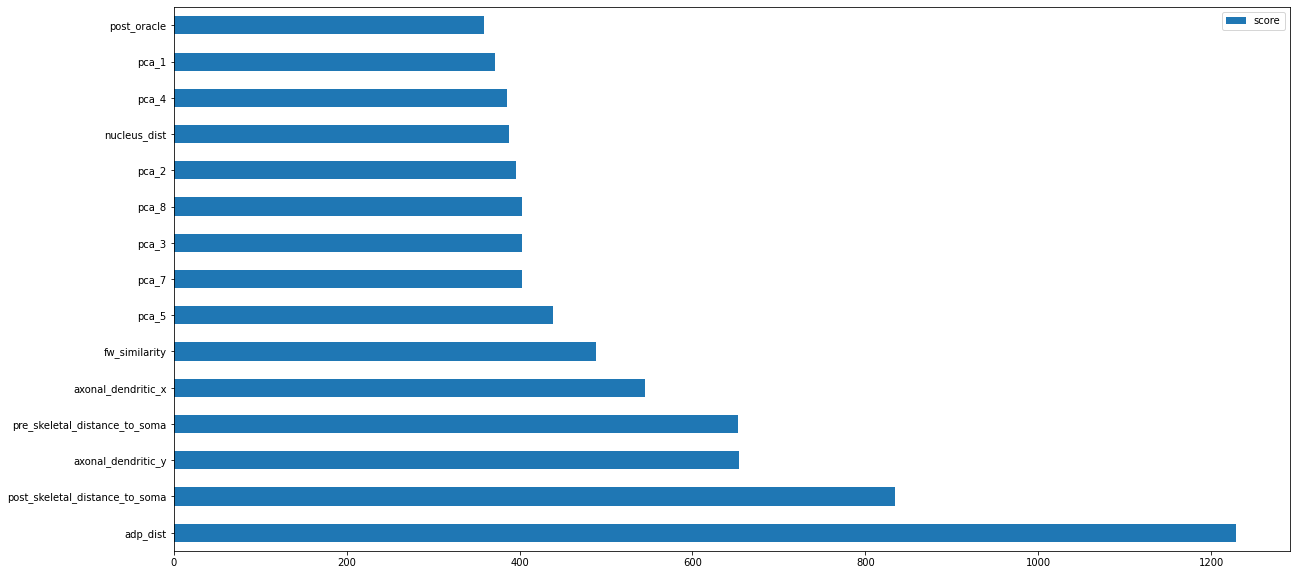

In [36]:
feature_important = random_searchXGB.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(15, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 15 features

### Submission

In [54]:
leader = pd.read_csv('leaderboard_data.csv')
leader

,ID,axonal_coor_x,axonal_coor_y,axonal_coor_z,dendritic_coor_x,dendritic_coor_y,dendritic_coor_z,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,...,pre_brain_area,post_brain_area,pre_nucleus_x,pre_nucleus_y,pre_nucleus_z,post_nucleus_x,post_nucleus_y,post_nucleus_z,pre_nucleus_id,post_nucleus_id
0,0,527499,544761,912282,529457,543459,916958,4783.37,239163.00,178032.0,...,AL,V1,1368640,451392,861240,566528,777344,920800,582471,199477
1,1,1269890,471870,837816,1271230,469651,841045,4060.72,294573.00,1193910.0,...,AL,RL,1368640,451392,861240,1196352,492736,919560,582471,518848
2,2,666057,469875,925239,665387,467214,923430,2912.80,4102.75,387714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
3,3,696633,453516,925806,696648,453417,921875,3272.83,31123.00,424714.0,...,AL,V1,1368640,451392,861240,669760,470336,913720,582471,256716
4,4,567525,585921,888426,570714,583676,891264,4441.75,114201.00,250411.0,...,AL,V1,1368640,451392,861240,672384,609728,932720,582471,260802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42588,42588,765513,818622,870114,766346,817181,871011,1597.63,74187.70,426027.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42589,42589,784476,609000,828177,782564,606911,828562,2607.11,172794.00,553175.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42590,42590,766038,773808,861693,763428,773490,862976,2648.36,44174.50,372663.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443
42591,42591,738276,614460,855099,741617,612387,854028,3843.24,178179.00,517147.0,...,V1,V1,741376,572288,837120,807168,757376,869080,294484,335443


In [55]:
leader = (
    leader.merge(
        feature_weights.rename(columns=lambda x: "pre_" + x), 
        how="left", 
        validate="m:1",
        copy=False,
    )
    .merge(
        feature_weights.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "pre_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
    .merge(
        morph_embeddings.rename(columns=lambda x: "post_" + x),
        how="left",
        validate="m:1",
        copy=False,
    )
)

In [57]:
ids = leader['ID']
X_test = leader.drop(columns=['ID'])
X_test = feat_engineering(X_test)
X_test = dim_reduction(X_test)

submit_preds = random_searchLR.predict(X_test)

In [58]:
X_test

,adp_dist,post_skeletal_distance_to_soma,pre_skeletal_distance_to_soma,pre_oracle,pre_test_score,pre_rf_x,pre_rf_y,post_oracle,post_test_score,post_rf_x,...,post_embedding_22,post_embedding_23,post_embedding_24,post_embedding_25,post_embedding_26,post_embedding_27,post_embedding_28,post_embedding_29,post_embedding_30,post_embedding_31
0,1.569857,1.066950,-1.520389,0.371616,-0.365468,2.580623,-1.409183,0.880813,0.454349,-0.983640,...,-0.822075,-1.588143,1.090665,1.701615,0.438286,0.914266,1.472940,1.593512,-0.513389,-1.664510
1,1.072992,1.548930,0.949414,0.371616,-0.365468,2.580623,-1.409183,1.170133,-0.223748,-0.437916,...,1.112221,-1.659612,1.003983,-0.798657,-1.002563,0.536926,-1.464294,-0.374636,0.427327,1.952948
2,0.283729,-0.977701,-1.010610,0.371616,-0.365468,2.580623,-1.409183,-0.889101,0.590201,-0.438236,...,-0.672662,0.266253,1.139332,-1.933576,-2.596182,-1.248946,-1.680953,-1.103837,1.638249,1.623781
3,0.531271,-0.742668,-0.920656,0.371616,-0.365468,2.580623,-1.409183,-0.889101,0.590201,-0.438236,...,-0.672662,0.266253,1.139332,-1.933576,-2.596182,-1.248946,-1.680953,-1.103837,1.638249,1.623781
4,1.334973,-0.020021,-1.344421,0.371616,-0.365468,2.580623,-1.409183,0.581479,0.526492,-0.489448,...,0.353465,0.525926,-1.455872,-0.318953,0.817135,-0.059082,0.157793,-0.701958,-0.237699,0.680288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42588,-0.620528,-0.368073,-0.917464,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,0.522340,-0.996986,-0.012546,0.032747,-0.311485,-0.059186,0.673433,-0.325542,1.049695,-0.164990
42589,0.073549,0.489645,-0.608341,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,0.522340,-0.996986,-0.012546,0.032747,-0.311485,-0.059186,0.673433,-0.325542,1.049695,-0.164990
42590,0.101911,-0.629141,-1.047202,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,0.522340,-0.996986,-0.012546,0.032747,-0.311485,-0.059186,0.673433,-0.325542,1.049695,-0.164990
42591,0.923462,0.536486,-0.695932,0.430932,0.065340,-0.476560,1.268334,-0.040713,-0.247062,0.224686,...,0.522340,-0.996986,-0.012546,0.032747,-0.311485,-0.059186,0.673433,-0.325542,1.049695,-0.164990


In [59]:
X_test.columns[X_test.isna().any()].tolist()


[]

In [60]:
submit = pd.DataFrame(submit_preds, columns = ['connected'])
submit = submit['connected'].replace({0:False, 1:True})
submit = pd.DataFrame(submit, columns = ['connected'])
submit['ID'] = ids
submit = submit[['ID','connected']]


submit.head()

,ID,connected
0,0,False
1,1,False
2,2,False
3,3,False
4,4,False


In [61]:
submit.to_csv('submission.csv', index=False)


In [62]:
submit.connected.value_counts()

False    30494
True     12099
Name: connected, dtype: int64